# ¡Hola, Arturo!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

#Comentarios Estudiante - Plan de Solución

La primero a realizar es extraer la información de los archivos CSV y comprobar como se ha guardado la información. Es necesario asegurarse que no haya datos faltantes para poder pensar como limpiar la información antes de utilizarla para el análisis. Para eso debemos important pandas y leer cada archivo por separando, guardando cada archivo CSV en un dataframe por separado.
También es necesario ver que los datos se estén leyendo de la manera correcta y que están dividos por comas. De ser el caso contrario necesitamos usar el parámetro 'sep=' para leer la información de manera correcta.

In [1]:
import pandas as pd# importar librerías

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord_prds = pd.read_csv('/datasets/order_products.csv', sep=';') # leer conjuntos de datos en los DataFrames

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta importación de datos y de librerías.
</div>

In [3]:
df_orders.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
df_products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df_aisles.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
df_departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_ord_prds.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


#Comentarios Estudiante - Conclusión 1

Los datos en los archivos de CSV no están divididos por comas (,) sino que tienen una separación distinta por punto y coma (;). Además de exportar los archivos se debe de indicar en la función un parámetro de 'sep=' para poder dividir y trabajar con la información de manera correcta.
Las bases de datos de 'orders' y 'products' tienen datos ausentes.
Es necesario procesar estas bases antes de empezarlas a utilizar para nuestros análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de los datos.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

#Comentarios Estudiante - Observaciones Paso 2

Todas las bases de datos muestran que las columnas con IDs son tipos de datos 'int64', lo que significa que se leyeron los datos de la manera correcta y se les asignó el tipo de dato de número entero. En este caso no veo necesario cambiar el tipo de datos de los IDs a números enteros.

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1.- Ya que todos los datos en las columnas con ID son del tipo 'int64' no es necesario cambiar el tipo de datos para utilizar la información a futuro.

2.- Es tiempo de encontrar y eliminar valores duplicados que puedan cambiar por completo el análisis de los datos. Es necesario procesar estos datos usando los método duplicated() y sum() para encontrar cuales datos están duplicados y la cantidad de datos duplicados. También utilizaré el método sort_values() para poder presentar la información de una manera más sencilla de leerse
Despuñes de haber anañizado los datos duplicados los eliminaré usando el método drop_duplicates().

3.- Finalmente es necesario procesar los valores ausentes para que no nos arroje un error nuestros análisis al usar funcione y fórmulas. Utilizaré el método fillna() para llenar valores asuentes con valores útiles para el análisis.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
df_orders_duplicated = df_orders[df_orders.duplicated(keep=False)].sort_values(by='order_id') # Revisa si hay pedidos duplicados
display(df_orders_duplicated)
print()
print(f"Existen {df_orders_duplicated.duplicated().sum()} filas duplicadas en la base 'df_orders'")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0



Existen 15 filas duplicadas en la base 'df_orders'


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

#Comentarios Estudiante 2.5.1

Si existen varias líneas duplicads, las cuales todas se produjeron el día 3 que equivaldría a el miércoles a las 2 am. Al ser horario de 24 horas, sabemos que 2 equivale 2 AM.
En este caso tenemos un total de 15 datos duplicados en la base de datos 'orders'.

In [9]:
df_orders_wed_two = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)].sort_values(by='order_id')
display(df_orders_wed_two.sort_values(by='order_id'))
#Basándote en tus hallazgos.
print(f"Se registró un total de {df_orders_wed_two['order_number'].count()} ordenes el día miércoles a las 2AM")
#Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


Se registró un total de 121 ordenes el día miércoles a las 2AM


In [10]:
df_orders_wed_two_duplicated = df_orders_wed_two[df_orders_wed_two.duplicated(keep=False)].sort_values(by='order_id')
display(df_orders_wed_two_duplicated)
print()
print(f"Existen {df_orders_wed_two_duplicated.duplicated().sum()} ordenes duplicadas el día miércoles a las 2AM")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
119251,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
99462,794638,50898,24,3,2,2.0
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0



Existen 15 ordenes duplicadas el día miércoles a las 2AM


¿Qué sugiere este resultado?

#Comentarios Estuciante 2.5.1 (2)

En este caso aislamos una base de datos filtrando por día 3 = miércoles y por hora 2 = 2am.
Creamos un nuevo dataframe para analizar si era un error que se había repetido constantemente durante ese día a esa hora. Usamos filtro en base a la columnas 'order_dow' para el día de la semana y 'order_hour_of_day' para la hora.
Usamos '&' para crear un filtro con estas dos condiciones y el método sort_values() para poder ver la información con más facilidad.
Después de aislar los datos y crear otra tabla de datos, revisamos nuevamente los duplicados para ver si todos se encontraban durante este periodo de tiempo.
Afortunadamente, todos los duplicados se encontraban en este rango de tiempo, así que sabemos que durante ese momento hubo un error en el sistema y duplico 15 ordenes por error.

In [12]:
df_orders = df_orders.drop_duplicates().reset_index(drop=True) # Elimina los pedidos duplicados
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [13]:
print(f"El número de filas duplicadas en la base de 'df_orders' ahora es igual a: {df_orders.duplicated().sum()}")
# Vuelve a verificar si hay filas duplicadas

El número de filas duplicadas en la base de 'df_orders' ahora es igual a: 0


In [14]:
print(f"Existe {df_orders['order_id'].duplicated().sum()} valores duplicados en la columna 'order_id'") 
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

Existe 0 valores duplicados en la columna 'order_id'


Describe brevemente tus hallazgos y lo que hiciste con ellos

#Comentarios Estudiante

Había un total de 15 registros duplicados de ordenes realizadas el día miércoles a las 2AM.
Estos fueron encontrados y eliminados de la base de 'df_orders' para no alterar el análisis de la información.

### `products` data frame

In [15]:
print(f"Existen {df_products.duplicated().sum()} filas duplicadas en la base 'df_products'")
# Verifica si hay filas totalmente duplicadas

Existen 0 filas duplicadas en la base 'df_products'


In [16]:
print(f"Existen {df_products['product_id'].duplicated().sum()} registros duplicados en la columna 'product_id'")
# Verifica únicamente si hay IDs duplicadas de productos

Existen 0 registros duplicados en la columna 'product_id'


In [17]:
df_products['product_name'] = df_products['product_name'].str.upper()
print(f"Existen {df_products['product_name'].duplicated().sum()} valores duplicados en la columna 'product_name'")
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

Existen 1361 valores duplicados en la columna 'product_name'


In [18]:
df_products_miss = (df_products['product_name'].duplicated().sum()) - (df_products['product_name'].isna().sum())
print(f"Existen {df_products_miss} nombres duplicados en productos no faltantes")
# Revisa si hay nombres duplicados de productos no faltantes

Existen 103 nombres duplicados en productos no faltantes


In [19]:
display(df_products[df_products['product_name'].duplicated(keep=False)].sort_values(by='product_name'))

,product_id,product_name,aisle_id,department_id
23339,23340,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
31844,31845,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP,25,11
19941,19942,AGED BALSAMIC VINEGAR OF MODENA,19,13
13152,13153,AGED BALSAMIC VINEGAR OF MODENA,19,13
24830,24831,ALBACORE SOLID WHITE TUNA IN WATER,95,15
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [20]:
df_products = df_products.drop_duplicates(subset='product_name').reset_index(drop=True)
print(f"Ahora existen {df_products['product_name'].duplicated().sum()} valores duplicados en la columna 'product_name'")

Ahora existen 0 valores duplicados en la columna 'product_name'


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comentarios Estudiante

Existe 103 productos registrados que están duplicados en esta base de datos.
Estos no indican algún gramaje o presentación distinta, así que los productos están duplicados aunque cuenten con un 'product_id' distinto.
Así que en base al nombre del product, eliminamos los duplicados usando drop.duplicates() para dejar más limpia la base de datos.

### `departments` data frame

In [21]:
print(f"Existen {df_departments.duplicated().sum()} filas duplicadas de la base 'df_departments'")
# Revisa si hay filas totalmente duplicadas

Existen 0 filas duplicadas de la base 'df_departments'


In [22]:
print(f"Existen {df_departments['department_id'].duplicated().sum()} IDs duplicados en la columa de 'department_id'")
# Revisa únicamente si hay IDs duplicadas de productos

Existen 0 IDs duplicados en la columa de 'department_id'


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comenarios Estudiante

Esta base de datos no cuenta con datos duplicados que se necesiten procesar.

### `aisles` data frame

In [23]:
print(f"Existen {df_aisles.duplicated().sum()} filas duplicadas en la base 'df_aisles'")
# Revisa si hay filas totalmente duplicadas

Existen 0 filas duplicadas en la base 'df_aisles'


In [24]:
print(f"Existen {df_aisles['aisle_id'].duplicated().sum()} valores duplicados en la columna de 'aisle_id'")
# Revisa únicamente si hay IDs duplicadas de productos

Existen 0 valores duplicados en la columna de 'aisle_id'


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comentarios Estudiante

Esta base de datos tampoco presnta datos duplicados que debamos de procesar para limpiar la data.

### `order_products` data frame

In [25]:
print(f"Existen {df_ord_prds.duplicated().sum()} filas duplicadas en la base 'df_ord_prds'")
# Revisa si hay filas totalmente duplicadas

Existen 0 filas duplicadas en la base 'df_ord_prds'


In [26]:
display(df_ord_prds['order_id'].value_counts())
# Vuelve a verificar si hay cualquier otro duplicado engañoso

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comentario Estudiante

Esta última base cunat con varios duplicados en la columna de 'order_id', esto se puede deber a que se registra cada products por orden

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en esta sección.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
print(f"Existe {df_products['product_name'].isna().sum()} valor ausente en la columna 'product_name'")
# Encuentra los valores ausentes en la columna 'product_name'

Existe 1 valor ausente en la columna 'product_name'


Describe brevemente cuáles son tus hallazgos.

In [28]:
df_products_a100 = df_products[(df_products['aisle_id'] == 100)]
display(df_products_a100)
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

#Comentario Estudiante

Existe un valor ausente que está relacionado al id 100 de la columna 'aisle_id'

In [29]:
df_products_d21 = df_products[(df_products['department_id'] == 21)]
display(df_products_d21)
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

#Comentario Estudiante

Existe un valor ausente que se relaciona al id 21 de la columna 'department_id'

In [30]:
display(df_departments[df_departments['department_id'] == 21])
print()
display(df_aisles[df_aisles['aisle_id'] == 100]) # Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


Describe brevemente cuáles son tus hallazgos.

#Comentario Estudiante

El pasillo y departamento son para productos que falten por ser asignados o no sean reconocidos.

In [31]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
display(df_products[(df_products['aisle_id'] == 100)])
# Completa los nombres de productos ausentes con 'Unknown'

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comentario Estudiante

Se cambiaron los valores ausentes a los valores indicados para procesar los datos.
Al tener valores ausentes en la columna 'product_name' usamos el método fillna() para procesar los valores ausentes y luego usamos un filtro sobre el pasillo que mostraba el valor ausente para demostrar que si se efctuó el cambio correctamente.

### `orders` data frame

In [32]:
df_orders.isna().sum()
# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [33]:
df_orders[(df_orders['order_number'] == 1)].isna().sum()
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Comentario Estudiante

Todos los valores ausentes se encuentran en la columna 'days_since_prior_order' cuando el número de orden es igual a 1. Lo que quiere decir es que no hay un conteo de días previos a la primera orden realizada desde la aplicación. Esta información es imposible de tener ya que sólo podemos generar esta información a partir de la primera compra.

### `order_products` data frame

In [34]:
df_ord_prds.isna().sum()
# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [35]:
print(df_ord_prds['add_to_cart_order'].max())
print(df_ord_prds['add_to_cart_order'].min())
# ¿Cuáles son los valores mínimos y máximos en esta columna?

64.0
1.0


Describe brevemente cuáles son tus hallazgos.

#Comentario Estudiante

En la columna 'add_to_cart_order' tenemos el orden secuencial de como se fueron agregando los productos al carrito. El máximo de productos que se han agregado a un carrito de manera secuancial han sido 64 y el mínimo secuancial es 1.
Sólamente en esta columna contamos con valores ausentes.

In [36]:
isna_df_ord_prds = df_ord_prds[(df_ord_prds['add_to_cart_order'].isna())]['order_id']
display(isna_df_ord_prds)
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [37]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

In [38]:
filtered_isna_df_orders = df_ord_prds[df_ord_prds['order_id'].isin(isna_df_ord_prds)]
display(filtered_isna_df_orders.groupby(['order_id'])['product_id'].count().min())

65

#Comentario Estudiante

Si todos los pedidos con valores ausentes tienen más de 64 productos.

Describe brevemente cuáles son tus hallazgos.

In [39]:
df_ord_prds['add_to_cart_order'] = df_ord_prds['add_to_cart_order'].fillna(999).astype('int') # Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
display(df_ord_prds.sort_values(by='add_to_cart_order'))
df_ord_prds.info()

,order_id,product_id,add_to_cart_order,reordered
2496737,1401068,45924,1,0
504216,2652045,30287,1,1
4262232,1766685,17794,1,1
2449903,3314253,47042,1,1
3640493,1523934,5876,1,1
...,...,...,...,...
3613118,2721963,22935,999,1
1420474,3125735,34942,999,1
1726184,1730767,43735,999,0
2612611,2926893,42611,999,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


#Comentario Estudiante

Cambiamos todos los valores de 'add_to_cart_order' a 999 para que fuera más fácil identificar los pedidos con valores ausentes.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
ver_orders = df_orders['order_hour_of_day'].unique()
display(sorted(ver_orders))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [41]:
ver_dow = df_orders['order_dow'].unique()
display(sorted(ver_dow))

[0, 1, 2, 3, 4, 5, 6]

Escribe aquí tus conclusiones

#Comentario Alumno

Los rangos dentro de 'order_hour_of_day' y 'order_dow' cumple con los rango en los que buscamos que oscilen.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:xlabel='order_hour_of_day'>

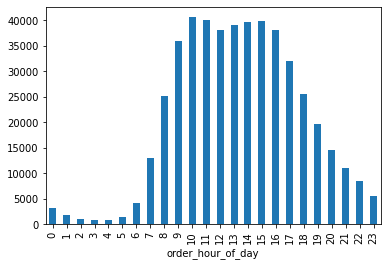

In [42]:
df_orders_hour_id = df_orders.groupby(['order_hour_of_day'])['user_id'].count()
df_orders_hour_id.plot(kind='bar')

Escribe aquí tus conclusiones

#Comentarios Estudiante

El pico de actividad en pedidos es las 10 de la mañana cuando la gente pide comida para el almuerzo-
De las 10 AM hasta las 16 PM se ve la mayor parte de la actividad de la plataforma.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:xlabel='order_dow'>

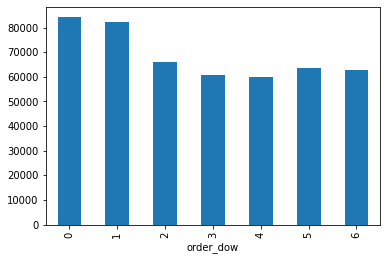

In [43]:
df_dow = df_orders.groupby(['order_dow'])['user_id'].count()
df_dow.plot(kind='bar')

#Comentario Estudiante

Los usuarios compran víveres todos los días de la semana.
El día 0 siendo el lunes, es el día con más actividad en tienda, así que es el día que más se compran víveres.

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: user_id, dtype: int64

La mayoría de los usuarios, que equivale a 51337 tardan hasta 30 días en realizar otro pedido
La minoría de los usuarios, que equivale a 2640 tadan hasta 26 días en realizar otro pedido


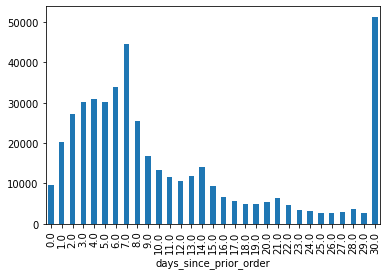

In [44]:
df_prior_days = df_orders.groupby(['days_since_prior_order'])['user_id'].count()
display(df_prior_days)
df_prior_days.plot(kind='bar')
print(f"La mayoría de los usuarios, que equivale a {df_prior_days.max()} tardan hasta 30 días en realizar otro pedido")
print(f"La minoría de los usuarios, que equivale a {df_prior_days.min()} tadan hasta 26 días en realizar otro pedido")

Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
order_hour_wed = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()

In [48]:
order_hour_sat = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

<AxesSubplot:>

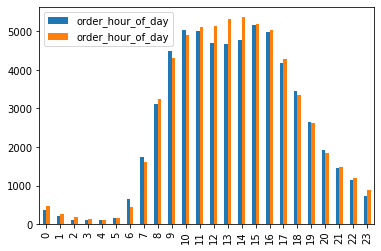

In [49]:
wed_sat = pd.concat([order_hour_wed, order_hour_sat], axis=1)
wed_sat.plot(kind='bar')

Escribe aquí tus conclusiones

# Comentario Estudiante

Por alguna razón este gráfico no quiere generarse.
Esta ejercicio lo hice con apoyo de un instructor y debería estar bien.
Espero puedan ver el gráfico.
Esto está trabando el programa y no deja que pueda validar los códigos que están debajo.
Dejé esa celda como Markdown para que no viciara el código.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:>

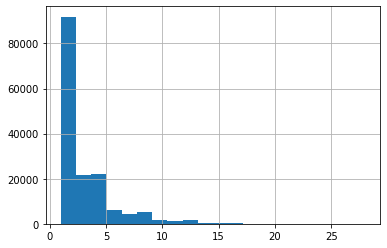

In [50]:
df_groupby_clients_order = df_orders.groupby(['user_id'])['order_id'].count()
df_groupby_clients_order.hist(bins=20)

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [51]:
df_merged_prods = df_products.merge(df_ord_prds, left_on='product_id', right_on='product_id')
display((df_merged_prods.groupby(['product_id', 'product_name'])['order_id'].count()).sort_values().tail(20))

product_id  product_name            
40706       ORGANIC GRAPE TOMATOES      11781
8277        APPLE HONEYCRISP ORGANIC    11993
5876        ORGANIC LEMON               12232
28204       ORGANIC FUJI APPLE          12544
49683       CUCUMBER KIRBY              13675
39275       ORGANIC BLUEBERRIES         13879
45007       ORGANIC ZUCCHINI            14584
24964       ORGANIC GARLIC              15292
22935       ORGANIC YELLOW ONION        15898
27966       ORGANIC RASPBERRIES         19197
27845       ORGANIC WHOLE MILK          19600
26209       LIMES                       19690
16797       STRAWBERRIES                20018
47626       LARGE LEMON                 21495
47766       ORGANIC AVOCADO             24689
47209       ORGANIC HASS AVOCADO        29773
21903       ORGANIC BABY SPINACH        33971
21137       ORGANIC STRAWBERRIES        37039
13176       BAG OF ORGANIC BANANAS      53297
24852       BANANA                      66050
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

#Comentario Estudiante

Los productos más populares son frutas y verduras. El único producto que sobresale de este tipo de productos es leche entera.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
df_merged_products_and_orders = df_orders.merge(df_ord_prds, left_on='order_id', right_on='order_id')

<AxesSubplot:>

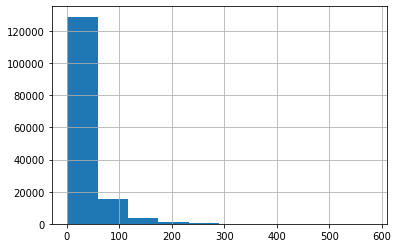

In [58]:
merged_hist = df_merged_products_and_orders.groupby(['user_id'])['product_id'].count()
merged_hist.hist()

Escribe aquí tus conclusiones

#Comentario Estudiante

Este gráfico también está teniendo problemas en generarse y traba el código.
Volví la celda un markdown para que no se trabara el código.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [59]:
filtered_orders = df_ord_prds[df_ord_prds['reordered'] == 1]

In [60]:
merged_top20 = filtered_orders.merge(df_products, left_on='product_id', right_on='product_id')

In [61]:
display(merged_top20.groupby(['product_id', 'product_name'])['order_id'].count().sort_values().tail(20))

product_id  product_name            
49235       ORGANIC HALF & HALF          8389
5876        ORGANIC LEMON                8412
39275       ORGANIC BLUEBERRIES          8799
8277        APPLE HONEYCRISP ORGANIC     8836
28204       ORGANIC FUJI APPLE           8989
49683       CUCUMBER KIRBY               9538
45007       ORGANIC ZUCCHINI            10076
24964       ORGANIC GARLIC              10411
22935       ORGANIC YELLOW ONION        11145
26209       LIMES                       13327
16797       STRAWBERRIES                13945
27966       ORGANIC RASPBERRIES         14748
47626       LARGE LEMON                 15044
27845       ORGANIC WHOLE MILK          16251
47766       ORGANIC AVOCADO             18743
47209       ORGANIC HASS AVOCADO        23629
21903       ORGANIC BABY SPINACH        26233
21137       ORGANIC STRAWBERRIES        28639
13176       BAG OF ORGANIC BANANAS      44450
24852       BANANA                      55763
Name: order_id, dtype: int64

Escribe aquí tus conclusiones

#Comentario Estudiante

La categoría de los productos que se vuelven a pedir con más frecuencia coinciden con los productos más populares. Tantos frutas y verduras como lácteos básicos.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [62]:
merged_for_products = df_ord_prds.merge(df_products, left_on='product_id', right_on='product_id')

In [63]:
display(merged_for_products.groupby(['product_id', 'product_name'])['reordered'].mean().sort_values())

product_id  product_name                                                             
15413       ORGANIC CHAI COLA PROBIOTIC ELIXER                                           0.0
17729       TEN CALORIE LEMON LIME SODA                                                  0.0
38823       SRIRACHA                                                                     0.0
17724       PHOENIX BODY WASH WITH PUMP                                                  0.0
7011        FUSION POWER RAZOR AND CARTRIDGE                                             0.0
                                                                                        ... 
32722       SALMON JERKY DOG TREATS                                                      1.0
14644       CABERNET SAUVIGNON- H3 COLLECTION- HORSE HEAVEN HILLS                        1.0
48372       CARAMEL COFFEE CAKE GROUND COFFEE                                            1.0
11124       TURKEY/CHICKEN/CHICKEN LIVER HEALTHY KITTEN CAT FOOD             

Escribe aquí tus conclusiones

#Comentario Estudiante

Los productos que más se vuelven a pedir no coicide con el top de productos más vendidos.
Productos para mascotas y productos considerados como indulgencias son los que con más frecuencia se reordenen.
Este indicador nos hace ver la adherencia que tiene los usuarios con cada producto.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [64]:
merged_for_clients = df_ord_prds.merge(df_orders, left_on='order_id', right_on='order_id')

In [65]:
merged_for_clients_2 = merged_for_clients.merge(df_products, left_on='product_id', right_on='product_id')

In [66]:
display(merged_for_clients_2.groupby(['user_id', 'product_name'])['reordered'].mean().sort_values())

user_id  product_name                                   
2        ARTICHOKE SPINACH DIP                              0.0
112548   HARDWOOD SMOKED LOWER SODIUM BACON                 0.0
         GRILLED TILAPIA SIGNATURE GRILLED  FISH FILLETS    0.0
         GLAZED CHICKEN                                     0.0
         FAT FREE COTTAGE CHEESE                            0.0
                                                           ... 
143615   SPA CUISINE BUTTERNUT SQUASH RAVIOLI               1.0
30034    MARINARA PASTA SAUCE                               1.0
         ORGANIC AVOCADO                                    1.0
143615   UNSWEETENED APPLESAUCE                             1.0
102666   ORGANIC RED BELL PEPPER                            1.0
Name: reordered, Length: 3364387, dtype: float64

Escribe aquí tus conclusiones

#Comentario Estudiante

Con esta base podemos ver la adherencia de cada cliente a los productos que pide con más frecuencia. En base a esto podemos crear estrategias personalizadas para el tipo de consumo personal.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [67]:
filtered_orders_top20 = df_ord_prds[df_ord_prds['add_to_cart_order'] == 1]

In [68]:
merged_for_top_add = filtered_orders_top20.merge(df_products, left_on='product_id', right_on='product_id')

In [69]:
display(merged_for_top_add.groupby(['product_id', 'product_name'])['order_id'].count().sort_values().tail(29))

product_id  product_name                   
49683       CUCUMBER KIRBY                      1078
24838       UNSWEETENED ALMONDMILK              1127
35951       ORGANIC UNSWEETENED ALMOND MILK     1146
4210        WHOLE MILK                          1166
33198       SPARKLING NATURAL MINERAL WATER     1175
28204       ORGANIC FUJI APPLE                  1183
39275       ORGANIC BLUEBERRIES                 1185
8277        APPLE HONEYCRISP ORGANIC            1200
22935       ORGANIC YELLOW ONION                1246
43352       RASPBERRIES                         1246
27086       HALF & HALF                         1309
5785        ORGANIC REDUCED FAT 2% MILK         1310
12341       HASS AVOCADOS                       1340
26209       LIMES                               1370
38689       ORGANIC REDUCED FAT MILK            1397
196         SODA                                1733
47626       LARGE LEMON                         1737
49235       ORGANIC HALF & HALF                 1797
44

Escribe aquí tus conclusiones

#Comentario Estudiante

Este ejercicio funciona para concoer en que priorizar los usuarios cuando relaizan sus compras. De tal manera que podemos tener mayor atención a los productos más populares y prevenir que nos quedemos sin 'stock'.

### Conclusion general del proyecto:

#Conclusiones Generales

En general este proyecto fue muy informativo y me da un mayor entendimiento de la programación de datos en la vida cotifiana de un dat scientists. Nos ayuda a coomprende comportamientos y poder llegar a información crucial para el manejo de la relación con las tiendas y los consumo.
Quiero agradecer a los revisores, Carlos Ortiz y a Francisco Benavides por el apoyo con el proyecto.
Aseguro que para el siguiente proiyecto intentaré apoyarme menos de ustedes para poder retarme a hacer las cosas con independencias


<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Hola, Arturo. Nos quedan algunos elementos pendientes antes de poder aprobar tu proyecto. He dejado comentarios adicionales para ello.
</div>


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor #3</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>